In [70]:
# Team 074
# Group Member:
# Nicolas Martin (A14283795)
# Shuai Huang (A13534903)
# Ateyib Abdulkadir (A14190477)
# Sothyrak Srey (A14200308)

In [71]:
#Import required library for the project
import pandas as pd
import nltk
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:
# dataset by Barry Becker from the 1994 Census database. 
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [73]:
# In this project we want to see what features influence the income 
# We have a dataset with some features such as race, age, gender ... 
# We are going see if discriminations exists and if its exists what are the most important

# Part 1 : Load and Clean data

In [74]:
# dataset headers
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# read the dataframe from the file "adult.data
df = pd.read_csv("adult.data", sep=',', names = columns, error_bad_lines=False)
print(df.shape)

# print the dataset
df
df['workclass'].unique()

(32561, 15)


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [75]:
# cleaning some features by removing unnecessary columns
del df['fnlwgt']
del df['education-num']
del df['capital-gain']
del df['capital-loss']
del df['hours-per-week']
del df['marital-status']
del df['relationship']

In [76]:
# Print dataset
df

age          workclass      education          occupation  \
0       39          State-gov      Bachelors        Adm-clerical   
1       50   Self-emp-not-inc      Bachelors     Exec-managerial   
2       38            Private        HS-grad   Handlers-cleaners   
3       53            Private           11th   Handlers-cleaners   
4       28            Private      Bachelors      Prof-specialty   
5       37            Private        Masters     Exec-managerial   
6       49            Private            9th       Other-service   
7       52   Self-emp-not-inc        HS-grad     Exec-managerial   
8       31            Private        Masters      Prof-specialty   
9       42            Private      Bachelors     Exec-managerial   
10      37            Private   Some-college     Exec-managerial   
11      30          State-gov      Bachelors      Prof-specialty   
12      23            Private      Bachelors        Adm-clerical   
13      32            Private     Assoc-acdm               Sales   
14      40            Private      Assoc-voc        Craft-repair   
15      34            Private        7th-8th    Transport-moving   
16      25   Self-emp-not-inc        HS-grad     Farming-fishing   
17      32            Private        HS-grad   Machine-op-inspct   
18      38            Private           11th               Sales   
19      43   Self-emp-not-inc        Masters     Exec-managerial   
20      40            Private      Doctorate      Prof-specialty   
21      54            Private        HS-grad       Other-service   
22      35        Federal-gov            9th     Farming-fishing   
23      43            Private           11th    Transport-moving   
24      59            Private        HS-grad        Tech-support   
25      56          Local-gov      Bachelors        Tech-support   
26      19            Private        HS-grad        Craft-repair   
27      54                  ?   Some-college                   ?   
28      39            Private        HS-grad     Exec-managerial   
29      49            Private        HS-grad        Craft-repair   
...    ...                ...            ...                 ...   
32531   30                  ?      Bachelors                   ?   
32532   34            Private      Doctorate      Prof-specialty   
32533   54            Private      Bachelors     Exec-managerial   
32534   37            Private   Some-college        Adm-clerical   
32535   22            Private           12th     Protective-serv   
32536   34            Private      Bachelors     Exec-managerial   
32537   30            Private        HS-grad        Craft-repair   
32538   38            Private      Bachelors      Prof-specialty   
32539   71                  ?      Doctorate                   ?   
32540   45          State-gov        HS-grad        Adm-clerical   
32541   41                  ?        HS-grad                   ?   
32542   72                  ?        HS-grad                   ?   
32543   45          Local-gov     Assoc-acdm      Prof-specialty   
32544   31            Private        Masters       Other-service   
32545   39          Local-gov     Assoc-acdm        Adm-clerical   
32546   37            Private     Assoc-acdm        Tech-support   
32547   43            Private        HS-grad   Machine-op-inspct   
32548   65   Self-emp-not-inc    Prof-school      Prof-specialty   
32549   43          State-gov   Some-college        Adm-clerical   
32550   43   Self-emp-not-inc   Some-college        Craft-repair   
32551   32            Private           10th   Handlers-cleaners   
32552   43            Private      Assoc-voc               Sales   
32553   32            Private        Masters        Tech-support   
32554   53            Private        Masters     Exec-managerial   
32555   22            Private   Some-college     Protective-serv   
32556   27            Private     Assoc-acdm        Tech-support   
32557   40            Private        HS-grad   Machine-op-inspc

In [77]:
# We will replace any field '?' in occupation with 'Unemployed'
df['occupation'].replace(' ?', 'Unemployed', inplace=True) 
df['workclass'].replace(' ?', 'Unemployed', inplace=True)

In [78]:
# We want to keep only people from the US to our study
# Drop other countries
df = df[df['native-country'] == ' United-States']

# Display the first 10
df.head(10)

age          workclass      education          occupation    race  \
0    39          State-gov      Bachelors        Adm-clerical   White   
1    50   Self-emp-not-inc      Bachelors     Exec-managerial   White   
2    38            Private        HS-grad   Handlers-cleaners   White   
3    53            Private           11th   Handlers-cleaners   Black   
5    37            Private        Masters     Exec-managerial   White   
7    52   Self-emp-not-inc        HS-grad     Exec-managerial   White   
8    31            Private        Masters      Prof-specialty   White   
9    42            Private      Bachelors     Exec-managerial   White   
10   37            Private   Some-college     Exec-managerial   Black   
12   23            Private      Bachelors        Adm-clerical   White   

        sex  native-country  income  
0      Male   United-States   <=50K  
1      Male   United-States   <=50K  
2      Male   United-States   <=50K  
3      Male   United-States   <=50K  
5    Female   United-States   <=50K  
7      Male   United-States    >50K  
8    Female   United-States    >50K  
9      Male   United-States    >50K  
10     Male   United-States    >50K  
12   Female   United-States   <=50K

# Part 2: Exploratory Data Vizualization And Data Analysis

In [79]:
#Below is the dataset we explored and used in the prediction

#1.occupation in private working sector
# How many different occupations are in the dataset?
n_occupations = df['occupation'].value_counts().size
print("Number of occupations in the dataset: ", n_occupations)

#2.race in private working sector
# How many different races are in the dataset?
n_races = df['race'].value_counts().size
print("Number of races in the dataset: ", n_races)

#3.education in private working sector
# bar chart showing the number of people with their corresponding education level
n_education = df['education'].value_counts().size
print("Number of education in the dataset: ", n_education)

#4.gender in private working sector
n_gender = df['sex'].value_counts().size
print("Number of gender in the dataset: ", n_gender)

#5.age in private working sector
n_age = df['age'].value_counts().size
print("Number of age in the dataset: ", n_age)

Number of occupations in the dataset:  15
Number of races in the dataset:  5
Number of education in the dataset:  16
Number of gender in the dataset:  2
Number of age in the dataset:  73


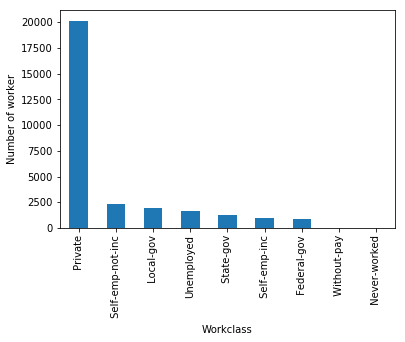

In [80]:
# bar chart showing the number of worker in each workclass
df2 = df['workclass'].value_counts()
ax = df2.plot(kind='bar')
ax.set_xlabel("Workclass")
ax.set_ylabel("Number of worker")

f1 = plt.gcf()

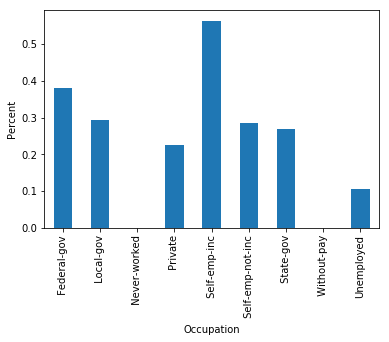

In [81]:
# bar chart showing the sector where people have an income greater than 50k in percentage
df_income = df[df['income'] == ' >50K']
df_income = df_income['workclass'].value_counts() / df['workclass'].value_counts()

ax = df_income.plot(kind='bar')
ax.set_xlabel("Occupation")
ax.set_ylabel("Percent")
f2 = plt.gcf()

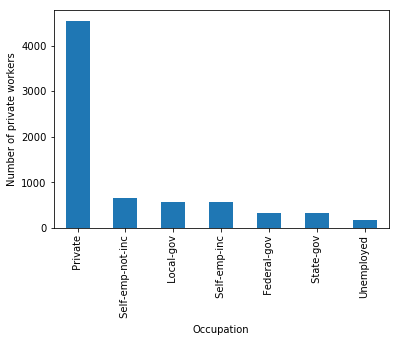

In [82]:
# bar chart showing the sector where people have an income greater than 50k
df_income = df[df['income'] == ' >50K']
df_income = df_income['workclass'].value_counts()

ax = df_income.plot(kind='bar')
ax.set_xlabel("Occupation")
ax.set_ylabel("Number of private workers")
f2 = plt.gcf()

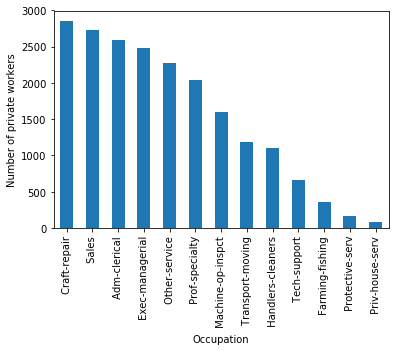

In [83]:
#we chose the private sector becuase it has the most of the data
# bar chart showing the people above 50k occupation in the private sector
df_income = df[df['income'] == ' >50K']
df_income = df[df['workclass'] == ' Private']
df_income = df_income['occupation'].value_counts()

ax = df_income.plot(kind='bar')
ax.set_xlabel("Occupation")
ax.set_ylabel("Number of private workers")
f2 = plt.gcf()


f2 = plt.gcf()

{' Craft-repair': 2854, ' Sales': 2734, ' Adm-clerical': 2586, ' Exec-managerial': 2477, ' Other-service': 2280, ' Prof-specialty': 2039, ' Machine-op-inspct': 1606, ' Transport-moving': 1181, ' Handlers-cleaners': 1101, ' Tech-support': 669, ' Farming-fishing': 356, ' Protective-serv': 162, ' Priv-house-serv': 90}
{' Craft-repair': 2854, ' Sales': 2734, ' Adm-clerical': 2586, ' Exec-managerial': 2477, ' Other-service': 2280, ' Prof-specialty': 2039, ' Machine-op-inspct': 1606, ' Transport-moving': 1181, ' Handlers-cleaners': 1101, ' Tech-support': 669, ' Farming-fishing': 356, ' Protective-serv': 162, ' Priv-house-serv': 90}
{' Exec-managerial': 1200, ' Prof-specialty': 885, ' Craft-repair': 667, ' Sales': 657, ' Adm-clerical': 290, ' Transport-moving': 247, ' Machine-op-inspct': 202, ' Tech-support': 201, ' Other-service': 76, ' Handlers-cleaners': 61, ' Protective-serv': 27, ' Farming-fishing': 27, ' Priv-house-serv': 1}


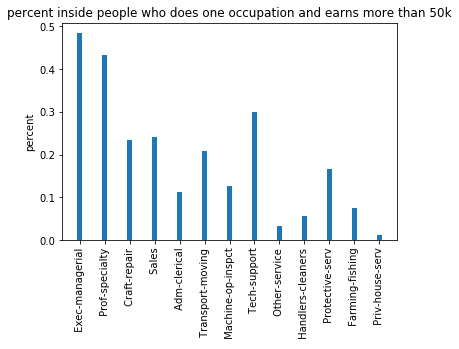

In [84]:
df2 = df[df['workclass'] == ' Private']
private = df2
private_occupation= private 
total_occupation = private['occupation'].value_counts()
#key: race, value: total num
dict_occupation = total_occupation.to_dict()
print(dict_occupation)

df_occupation_50k = private_occupation.loc[(private_occupation.income == ' >50K')]
occupation_50k = df_occupation_50k['occupation'].value_counts()
#key: race, value: 50k num
dict_occupation_50k = occupation_50k.to_dict()

print(dict_occupation)
print(dict_occupation_50k)

for key in dict_occupation:
    dict_occupation_50k[key] = float(dict_occupation_50k[key]/dict_occupation[key])

ax =plt.bar(range(len(dict_occupation_50k)), dict_occupation_50k.values(), 0.2)
plt.xticks(range(len(dict_occupation_50k)), dict_occupation_50k.keys())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel("percent")
plt.title("percent inside people who does one occupation and earns more than 50k")
f2 = plt.gcf()

In [85]:
# education
# people above 50k education in the private sector
# bar chart showing the people education have an income greater than 50k

all_education = df[df['workclass'] == ' Private']
df_all = all_education['education'].value_counts()
dict_all = df_all.to_dict()
print(dict_all)
df_income = all_education[all_education['income'] ==' >50K']
df_income_50k = df_income['education'].value_counts()
dict_50k_education = df_income_50k.to_dict()
dict_50k_education[' Preschool'] = 0
print(dict_50k_education)


{' HS-grad': 7148, ' Some-college': 4678, ' Bachelors': 3142, ' Assoc-voc': 931, ' 11th': 838, ' Masters': 777, ' Assoc-acdm': 669, ' 10th': 621, ' 7th-8th': 308, ' 9th': 286, ' 12th': 280, ' Prof-school': 219, ' Doctorate': 138, ' 5th-6th': 61, ' 1st-4th': 29, ' Preschool': 10}
{' Bachelors': 1357, ' HS-grad': 1059, ' Some-college': 864, ' Masters': 476, ' Assoc-voc': 235, ' Assoc-acdm': 158, ' Prof-school': 150, ' Doctorate': 104, ' 10th': 45, ' 11th': 43, ' 12th': 19, ' 9th': 16, ' 7th-8th': 13, ' 1st-4th': 1, ' 5th-6th': 1, ' Preschool': 0}


{' Bachelors': 0.43189051559516234, ' HS-grad': 0.14815332960268607, ' Some-college': 0.18469431380932022, ' Masters': 0.6126126126126126, ' Assoc-voc': 0.25241675617615467, ' Assoc-acdm': 0.23617339312406577, ' Prof-school': 0.684931506849315, ' Doctorate': 0.7536231884057971, ' 10th': 0.07246376811594203, ' 11th': 0.0513126491646778, ' 12th': 0.06785714285714285, ' 9th': 0.055944055944055944, ' 7th-8th': 0.04220779220779221, ' 1st-4th': 0.034482758620689655, ' 5th-6th': 0.01639344262295082, ' Preschool': 0.0}


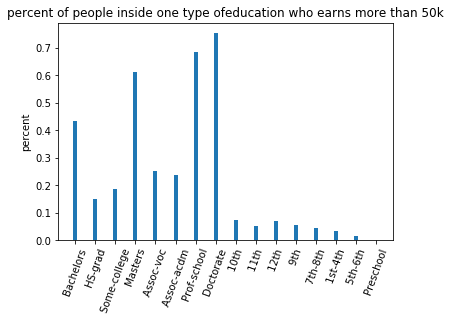

In [86]:
for key in dict_all:
    dict_50k_education[key] = float(dict_50k_education[key]/dict_all[key])

print(dict_50k_education)

ax =plt.bar(range(len(dict_50k_education)), dict_50k_education.values(), 0.2)
plt.xticks(range(len(dict_50k_education)), dict_50k_education.keys())
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel("percent")
plt.title("percent of people inside one type ofeducation who earns more than 50k")
f2 = plt.gcf()

In [87]:
#age
#construct the dictionary for different age groups and their own number of people whose income is >=50k
import numpy as np
import matplotlib.pyplot as plt
counts = private['age'].value_counts()

min_age = private.age.min()
max_age = private.age.max()

age_dict = counts.to_dict()
print(age_dict)
#record the fraction of the people who earn >50k in each age

{23: 641, 31: 597, 25: 597, 35: 582, 24: 577, 36: 576, 28: 575, 30: 572, 27: 568, 34: 567, 33: 566, 26: 562, 32: 547, 22: 544, 37: 543, 38: 533, 29: 530, 20: 528, 39: 520, 21: 516, 40: 508, 19: 502, 41: 455, 42: 451, 43: 441, 46: 436, 44: 435, 45: 421, 47: 398, 18: 392, 50: 338, 51: 334, 49: 319, 48: 315, 17: 284, 52: 266, 53: 255, 54: 229, 55: 228, 56: 205, 59: 196, 58: 193, 57: 171, 60: 160, 61: 155, 62: 126, 63: 103, 64: 84, 65: 79, 66: 55, 68: 54, 67: 46, 69: 42, 71: 31, 70: 30, 90: 24, 72: 23, 73: 22, 74: 17, 76: 17, 75: 11, 77: 9, 80: 8, 81: 6, 79: 5, 78: 4, 84: 4, 82: 3, 83: 1, 85: 1, 88: 1, 86: 1}


In [88]:
df_income_dict={}
for age in age_dict:
    df_income_dict[age] = private[private['age']== age]
fraction_income_dict = {}
for age in df_income_dict:
    totalppl = df_income_dict[age]
    sub_df = totalppl[totalppl['income'] ==' >50K']
    count = sub_df.shape[0]
    total = totalppl.shape[0]
    if total != 0:
        fraction_income_dict[age] = count/float(total)
    else:
        fraction_income_dict[age] = 0.0

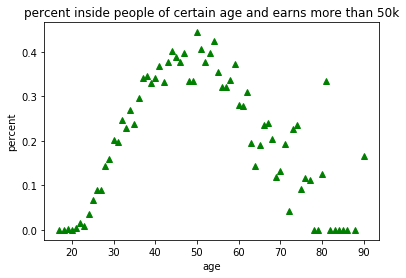

In [89]:
# percent of people of the age who earn more than 50k 
x = []
y = []
for eachage in fraction_income_dict:
    x.append(eachage)
    y.append(fraction_income_dict[eachage])
plt.ylabel("percent")
plt.xlabel("age")
plt.title("percent inside people of certain age and earns more than 50k")
plt.plot(x,y,'g^')

percentage of white:  88.0456915818
percentage of black:  9.66476285076
percentage of Asian:  0.953563446735
percentage of Indian American:  0.869133349888
percentage of other:  0.466848770797


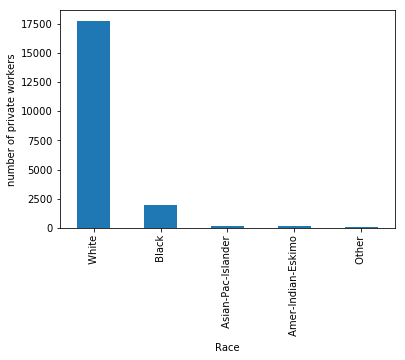

In [90]:
#after age, we are exploring race
# histogram chart showing the race in the private sector
df_race_private= private
df_race_private = df_race_private['race'].value_counts()
ax = df_race_private.plot(kind='bar')
ax.set_xlabel("Race")
ax.set_ylabel("number of private workers")
# Calculate the percentage of each race in private sector
print("percentage of white: ", 100 * df_race_private[0]/(df_race_private.sum()))
print("percentage of black: ", 100 * df_race_private[1]/(df_race_private.sum()))
print("percentage of Asian: ", 100 * df_race_private[2]/(df_race_private.sum()))
print("percentage of Indian American: ", 100 * df_race_private[3]/(df_race_private.sum()))
print("percentage of other: ", 100 * df_race_private[4]/(df_race_private.sum()))

f2 = plt.gcf()

{' White': 17728, ' Black': 1946, ' Asian-Pac-Islander': 192, ' Amer-Indian-Eskimo': 175, ' Other': 94}
{' White': 4276, ' Black': 199, ' Asian-Pac-Islander': 42, ' Amer-Indian-Eskimo': 17, ' Other': 7}


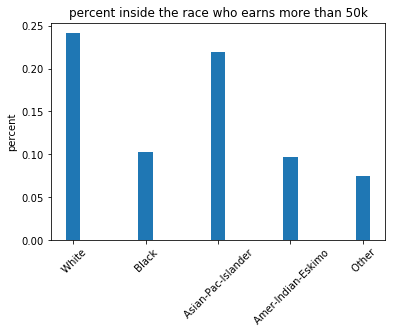

In [91]:
private_all = df.loc[(df.workclass == ' Private')]
private_race = private_all['race'].value_counts()
#key: race, value: total num
dict_race = private_race.to_dict()

df_race_private_50k = private_all.loc[(private_all.income == ' >50K')]
race_50k = df_race_private_50k['race'].value_counts()
#key: race, value: 50k num
dict_race_50k = race_50k.to_dict()


print(dict_race)
print(dict_race_50k)

for key in dict_race:
    dict_race_50k[key] = float(dict_race_50k[key]/dict_race[key])

ax =plt.bar(range(len(dict_race_50k)), dict_race_50k.values(), 0.2)
plt.xticks(range(len(dict_race_50k)), dict_race_50k.keys())
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel("percent")
plt.title("percent inside the race who earns more than 50k")
f2 = plt.gcf()

Percentage of male:  65.6021852496
Percentage of female:  34.3978147504


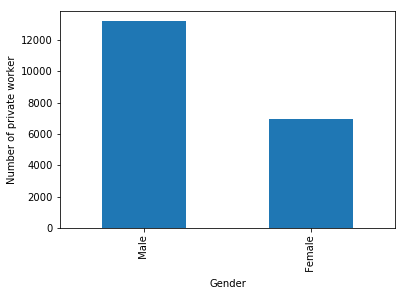

In [92]:
#gender
# histogram chart showing the number of each gender in the private sector
df_private_gender = df[df['workclass'] == ' Private']
df_private_gender = df_private_gender['sex'].value_counts()


ax = df_private_gender.plot(kind='bar')
ax.set_xlabel("Gender")
ax.set_ylabel("Number of private worker")

# Calculate the percentage of male and female in private sector
print("Percentage of male: ", 100 * df_private_gender[0]/(df_private_gender[1]+df_private_gender[0]))
print("Percentage of female: ", 100 * df_private_gender[1]/(df_private_gender[1]+df_private_gender[0]))
f2 = plt.gcf()

Percentage of male:  62.0927936821
Percentage of female:  37.9072063179


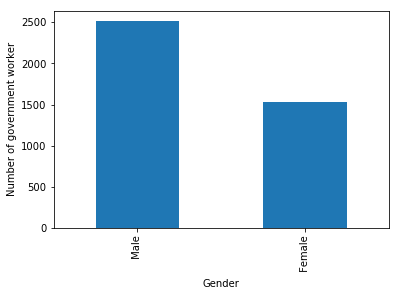

In [93]:
# Perform the same analysis on government (local, state, and federal)

# bar chart showing the occupation in the private sector
df_gov = df.loc[(df.workclass == ' Local-gov') | (df.workclass == ' State-gov') | (df.workclass == ' Federal-gov')]

df_gov_gender = df_gov['sex'].value_counts()

ax = df_gov_gender.plot(kind='bar')
ax.set_xlabel("Gender")
ax.set_ylabel("Number of government worker")


f2 = plt.gcf()


# Calculate the percentage of male and female in private sector
print("Percentage of male: ", 100 * df_gov_gender[0]/(df_gov_gender[1]+df_gov_gender[0]))
print("Percentage of female: ", 100 * df_gov_gender[1]/(df_gov_gender[1]+df_gov_gender[0]))
f2 = plt.gcf()

In [94]:
private_gender_and_income = private[['sex','income']]
private_male = private_gender_and_income[private_gender_and_income['sex'] == " Male"]
print(private_male)
count_male = private_male['income'].value_counts()
male_dict = count_male.to_dict()

private_female = private_gender_and_income[private_gender_and_income['sex'] == " Female"]
count_female = private_female['income'].value_counts()
female_dict = count_female.to_dict()
print(male_dict)
print(female_dict)

         sex  income
2       Male   <=50K
3       Male   <=50K
9       Male    >50K
10      Male    >50K
13      Male   <=50K
17      Male   <=50K
18      Male   <=50K
20      Male    >50K
23      Male   <=50K
26      Male   <=50K
28      Male   <=50K
29      Male   <=50K
31      Male   <=50K
32      Male   <=50K
36      Male   <=50K
40      Male   <=50K
42      Male   <=50K
44      Male   <=50K
46      Male   <=50K
49      Male   <=50K
55      Male    >50K
58      Male   <=50K
59      Male   <=50K
60      Male   <=50K
62      Male   <=50K
63      Male    >50K
64      Male   <=50K
65      Male   <=50K
70      Male   <=50K
73      Male   <=50K
...      ...     ...
32488   Male   <=50K
32489   Male   <=50K
32495   Male   <=50K
32496   Male   <=50K
32498   Male   <=50K
32499   Male   <=50K
32500   Male   <=50K
32501   Male   <=50K
32503   Male   <=50K
32505   Male   <=50K
32506   Male    >50K
32507   Male   <=50K
32512   Male   <=50K
32514   Male   <=50K
32517   Male   <=50K
32519   Male 

In [95]:
print(male_dict)
print(female_dict)
x_list = ['female', 'male']
total_female = female_dict[' <=50K'] + female_dict[' >50K']
total_male = male_dict[' <=50K']+ male_dict[' >50K']
for income in male_dict:
    print(income)
    male_dict[income] = male_dict[income] / total_male*100
for income in female_dict:
    female_dict[income] = female_dict[income]/total_female*100
print(male_dict)
print(female_dict) 

{' <=50K': 9330, ' >50K': 3879}
{' <=50K': 6264, ' >50K': 662}
 <=50K
 >50K
{' <=50K': 70.633658868952992, ' >50K': 29.366341131047015}
{' <=50K': 90.441813456540572, ' >50K': 9.5581865434594278}


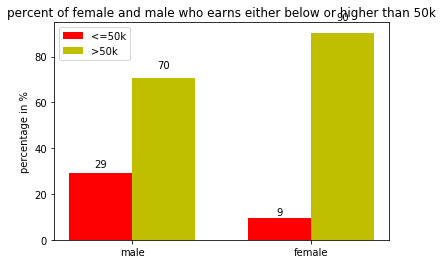

In [96]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind,[male_dict[' >50K'],female_dict[' >50K']],width, color='r')

rects2 = ax.bar(ind + width,[male_dict[' <=50K'],female_dict[' <=50K']], width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('percentage in %')
ax.set_title('percent of female and male who earns either below or higher than 50k')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('male', 'female'))

ax.legend((rects1[0], rects2[0]), ('<=50k', '>50k'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

# Part 3: Data Analysis with Income Prediction

In [97]:
# Here we are going to apply machine learning to see what are the most important
# features to determine that people are above or below 50k per year

In [98]:
# store income greater than > 50k and < 50k
income_negative = []
income_positive = []

# separate the income into > and < than 50k
income_negative = df.loc[df['income'] == ' <=50K']
income_positive = df.loc[df['income'] == ' >50K']

income_negative['income'].replace(' <=50K', 'negative',inplace=True)
income_positive['income'].replace(' >50K', 'positive',inplace=True)

income_50_plus = income_positive['income']
income_50_minus = income_negative['income']

del income_negative['income']
del income_positive['income']

row_negative=[]
for row in income_negative.iterrows():
    index, data = row
    row_negative.append(data)

row_positive=[]
for row in income_positive.iterrows():
    index, data = row
    # data.tolist()
    row_positive.append(data)


# only keep rows and their label as a list
df_negative = list(zip(row_negative, income_50_minus))
df_positive = list(zip(row_positive, income_50_plus))

print(df_negative)

/Users/shuai9532/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


[(age                           39
workclass              State-gov
education              Bachelors
occupation          Adm-clerical
race                       White
sex                         Male
native-country     United-States
Name: 0, dtype: object, 'negative'), (age                              50
workclass          Self-emp-not-inc
education                 Bachelors
occupation          Exec-managerial
race                          White
sex                            Male
native-country        United-States
Name: 1, dtype: object, 'negative'), (age                               38
workclass                    Private
education                    HS-grad
occupation         Handlers-cleaners
race                           White
sex                             Male
native-country         United-States
Name: 2, dtype: object, 'negative'), (age                               53
workclass                    Private
education                       11th
occupation         Handlers-cle

In [100]:
# merge the two list
df = df_negative + df_positive
# shuffle the dataframe
random.shuffle(df)

In [101]:
df_pred = []
for (words, income) in df:
    words_filtered = []
    #print(income)
    # add some rules to better tokenize
    for e in words:
        words_filtered.append(e)
    df_pred.append((words_filtered, income))
        
print(len(df_pred))
    
# shuffle the income dataset
random.shuffle(df_pred)

29170


In [102]:
# training and test set
# we keep 90% for the training set and 10% for the test set
limit_set = int(len(df_pred)/10)
test_set = df_pred[:limit_set]
training_set = df_pred[limit_set:]

In [103]:
print(test_set[:2])

[([47, ' Self-emp-not-inc', ' Bachelors', ' Exec-managerial', ' White', ' Male', ' United-States'], 'negative'), ([44, ' Private', ' HS-grad', ' Sales', ' White', ' Female', ' United-States'], 'negative')]


In [104]:
# Classifier

# the list of words features need to be extracted from the income. 
# it is a list with every distinct words ordered by frequency of appearance

def get_words_in_rows(row):
    all_words = []
    for (words, sentiment) in row:
        all_words.extend(words)
    return all_words

def get_word_feature(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.most_common()
    # split the list of tuples to keep the words
    word_features, freq = map(list,zip(*word_features))
    return word_features

word_features = get_word_feature(get_words_in_rows(df_pred))
print(len(word_features))
print(word_features[:20])

120
[' United-States', ' White', ' Private', ' Male', ' HS-grad', ' Female', ' Some-college', ' Bachelors', ' Exec-managerial', ' Prof-specialty', ' Craft-repair', ' Adm-clerical', ' Sales', 'Unemployed', ' Black', ' Other-service', ' Self-emp-not-inc', ' Local-gov', ' Machine-op-inspct', ' Masters']


In [105]:
# feature extractor
# dictionnary indicating what words are contained in the input passed
def extract_features(document):
    document_words = set(document)
    features = {}
    count = 0
    for word in word_features:
        # cerate our dictionnary of 3000 words
        if count == 119:
            break
        
        features['contain(%s)' %word] = (word in document_words)
        count = count + 1
    return features

In [106]:
len(word_features)

120

In [107]:
# apply feature to our classifier 
training_set = nltk.classify.apply_features(extract_features, training_set)
test_set = nltk.classify.apply_features(extract_features, test_set)
print('done')

done


In [108]:
# train our classifier
classifier = nltk.NaiveBayesClassifier.train(training_set)
print('done')

done


In [109]:
# we print our prediction accuracy
print(nltk.classify.accuracy(classifier, test_set))

0.7932807679122386


In [110]:
# testing the predictor
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0
total_row = 0
accuracy = []
precision = []
recall = []
# run the prediction several times 
for iteration in range(20):
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    total_row = 0
    random.shuffle(df_pred)
    limit_set = int(len(df_pred)/10)
    # we keep 10% of the dataset to test our prediction
    prediction_set = df_pred[:limit_set]
    for row, income in prediction_set:
        total_row = total_row + 1
        words = []
        for word in row:
            words.append(word)
        prediction = classifier.classify(extract_features(words))
    
        #print("prediction : ", prediction, "reality : ", income)

        if income == 'positive' and prediction == 'positive':
            true_positive = true_positive + 1
        if income == 'negative' and prediction == 'positive':
            false_positive = false_positive + 1
        
        if income == 'positive' and prediction == 'negative':
            false_negative = false_negative + 1
        if income == 'negative' and prediction == 'negative':
            true_negative = true_negative + 1
    # compute our result accuracy, precision, recall
    accuracy_result = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
    precision_result = true_positive / (true_positive + false_positive)
    recall_result = true_positive / (true_positive + false_negative)
    # add the array to plot the result
    accuracy.append(accuracy_result)
    precision.append(precision_result)
    recall.append(recall_result)
        


accuracy average :  0.789818306479
precision average :  0.576248901746
recall average :  0.580703440602


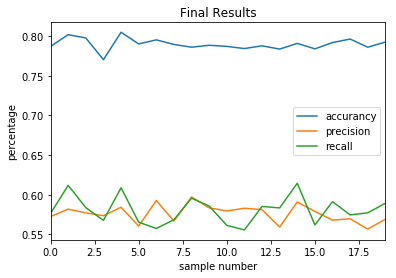

In [111]:
# plot the results of accuracy, precision and recall
import numpy as np

d = {'accurancy' : accuracy,
     'precision' : precision,
     'recall' : recall }

df = pd.DataFrame(d)

plot = df.plot()
plot.set_xlabel("sample number")
plot.set_ylabel("percentage")
plot.set_title("Final Results")

print("accuracy average : ",np.mean(accuracy))
print("precision average : ",np.mean(precision))
print("recall average : ",np.mean(recall))

In [112]:
# this shows us the weight of a word in our vector to predict the income
classifier.show_most_informative_features(150)

Most Informative Features
             contain(19) = True           negati : positi =     77.0 : 1.0
             contain(23) = True           negati : positi =     21.4 : 1.0
             contain(22) = True           negati : positi =     20.7 : 1.0
contain( Priv-house-serv) = True           negati : positi =     17.8 : 1.0
     contain( Doctorate) = True           positi : negati =     10.1 : 1.0
       contain( 1st-4th) = True           negati : positi =      9.3 : 1.0
   contain( Prof-school) = True           positi : negati =      9.0 : 1.0
             contain(24) = True           negati : positi =      8.2 : 1.0
 contain( Other-service) = True           negati : positi =      8.1 : 1.0
          contain( 11th) = True           negati : positi =      5.5 : 1.0
           contain( 9th) = True           negati : positi =      5.2 : 1.0
       contain( 7th-8th) = True           negati : positi =      5.1 : 1.0
       contain( 5th-6th) = True           negati : positi =      5.0 : 1.

# Part 4: Discussion and Conclusion

In [114]:

# Based on the data above, we are able to predict someone's income based on their race, gender, education, career, and age.
# Currently, we have an accuracy of about 80%. This might not be a really high accuracy, so our hypothesis does not stand, but we believe that it with more
# training data and more features, the result might be able to to imrpove.

# From the data analysis and visualization, we get to see that people with higher education and/or white
# are more likely to earn over 50k. However, suprisingly we found out that female has higher percentage of getting over 50k even if there are less women
# in the workplace. When we are taking age into account, people can expect their income to increase until the age of 50, 
#then there will be a decline after that age.